In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from random import *

In [2]:
data_train = pd.read_csv('./data/fashion-mnist_train.csv', header = 0)
data_train.head()
# print(data_train.shape)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# thay đổi shape của labels bằng reshape
# 60000 giá trị từ 0-9
# tensorflow yêu cầu labels là 1 vector 2 chiều
labels = data_train['label'].values.reshape(1, 60000)
# tập train có 60000 ảnh 28x28=784 pixels
train = data_train.drop('label', axis=1).transpose()
print(labels.shape)

# đưa giá trị pixels về 0-1 bằng cách chia cho 255 để giảm độ lớn của giá trị
train = np.array(train / 255.0)
print(train)

(1, 60000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()
labels_ = np.array(labels_)

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()
labels_ = np.array(labels_)


n_dim = 784
tf.reset_default_graph()
# Number of neurons in the layers
n1 = 5 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer


cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())
X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf. truncated_normal ([n1, n_dim], stddev=.1))
b1 = tf.Variable(tf.zeros([n1,1]))
W2 = tf.Variable(tf. truncated_normal ([n2, n1], stddev=.1))
b2 = tf.Variable(tf.zeros([n2,1]))
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1)
Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2)
y_ = tf.nn.softmax(Z2,0)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [22]:
sess = tf.Session()
sess.run(init)
epochs = 100
minibatch_size = 500
for i in range(epochs+1):
    for j in range(0, train.shape[1],minibatch_size):
        X_train_mini = train[:,j:j+minibatch_size] # 784,50
        Y_train_mini = labels_[:,j:j+minibatch_size]
        sess.run(optimizer,feed_dict={X:X_train_mini,Y:Y_train_mini,learning_rate:0.001})
    
    cost_ = sess.run(cost,feed_dict={X:train,Y:labels_,learning_rate:0.001})
    cost_history = np.append(cost_history,cost_)
    if (i % 50 == 0):
        print('Epoch: ',i,' cost: ',cost_)

# đánh giá lại model
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate:0.001}, session = sess))

Epoch:  0  cost:  0.3254006
Epoch:  50  cost:  0.32171646
Epoch:  100  cost:  0.3161142
Accuracy: 0.23343334


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
training_epochs = 5000
cost_history = []
for epoch in range(training_epochs+1):
    sess.run(optimizer, feed_dict = {X: train, Y: labels_, learning_rate:0.01})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate:0.01})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 20 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)
        
# đánh giá lại model
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate:0.01}, session = sess))

Reached epoch 0 cost J = 0.32397175
Reached epoch 20 cost J = 0.32383427
Reached epoch 40 cost J = 0.32369632
Reached epoch 60 cost J = 0.32355708
Reached epoch 80 cost J = 0.32341677
Reached epoch 100 cost J = 0.32327548
Reached epoch 120 cost J = 0.32313296
Reached epoch 140 cost J = 0.32298884
Reached epoch 160 cost J = 0.32284316
Reached epoch 180 cost J = 0.32269636
Reached epoch 200 cost J = 0.32254824
Reached epoch 220 cost J = 0.32239935
Reached epoch 240 cost J = 0.3222494
Reached epoch 260 cost J = 0.32209834
Reached epoch 280 cost J = 0.3219457
Reached epoch 300 cost J = 0.32179132
Reached epoch 320 cost J = 0.32163486
Reached epoch 340 cost J = 0.32147634
Reached epoch 360 cost J = 0.32131526
Reached epoch 380 cost J = 0.32115155
Reached epoch 400 cost J = 0.3209852
Reached epoch 420 cost J = 0.320816
Reached epoch 440 cost J = 0.32064372
Reached epoch 460 cost J = 0.32046822
Reached epoch 480 cost J = 0.32028937
Reached epoch 500 cost J = 0.32010704
Reached epoch 520 cost 

In [7]:
data_test = pd.read_csv('./data/fashion-mnist_test.csv', header = 0)
labels_dev = data_test['label'].values.reshape(1, 10000)
labels_dev_ = np.zeros((10000, 10))
labels_dev_[np.arange(10000), labels_dev] = 1
labels_dev_ = labels_dev_.transpose()
dev = data_test.drop('label', axis=1).transpose()

Accuracy: 0.4532


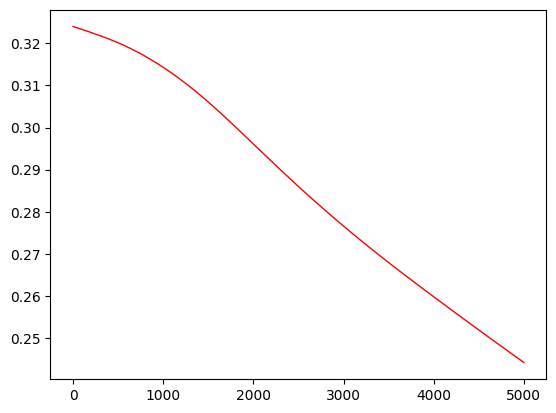

In [16]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: dev, Y: labels_dev_, learning_rate:
0.001}, session = sess))

# draw cost function
plt.plot(cost_history, 'r', label = 'cost', linewidth = 1)
plt.show()

In [12]:
# model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, 60000, minibatch_size):
            X_train_mini = features[:, i:i+minibatch_size]
            y_train_mini = classes[:, i:i+minibatch_size]
            sess.run(optimizer, feed_dict = {X: X_train_mini,Y: y_train_mini,learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        if (epoch % logging_step == 0):
            print("Reached epoch",epoch,"cost J =", cost_)
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    print ("Accuracy:", accuracy.eval({X: features, Y: classes, learning_rate:learning_r}, session = sess))
    return sess, cost_history

In [13]:
# thêm layer
def create_layer (X, n, activation):
    ndim = int(X.shape[0]) # số chiều của ma trận X
    stddev = 2 / np.sqrt(ndim) # độ lệch chuẩn
    initialization = tf.truncated_normal((n, ndim), stddev = stddev) # khởi tạo ma trận trọng số
    W = tf.Variable(initialization) # khởi tạo trọng số
    b = tf.Variable(tf.zeros([n,1])) # khởi tạo bias
    Z = tf.matmul(W,X)+b # tính Z
    return activation(Z)

n_dim = 784
n1 = 300
n2 = 300
n_outputs = 10
X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
learning_rate = tf.placeholder(tf.float32, shape=()) # learning rate
hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
outputs = create_layer (hidden2, n_outputs, activation = tf.identity) # layer 3
y_ = tf.nn.softmax(outputs) # softmax
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_)) # cost function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # optimizer
# minibatch_size = 100, training_epochs = 100, learning_r = 0.001

In [14]:
# minibatch_size = 100, training_epochs = 100, learning_r = 0.001
sess, cost_history = model(100, 100, train, labels_, logging_step = 50, learning_r = 0.001)

Reached epoch 0 cost J = 1.0820993
Reached epoch 50 cost J = 0.94832355
Reached epoch 100 cost J = 0.93900573
Accuracy: 0.8121333


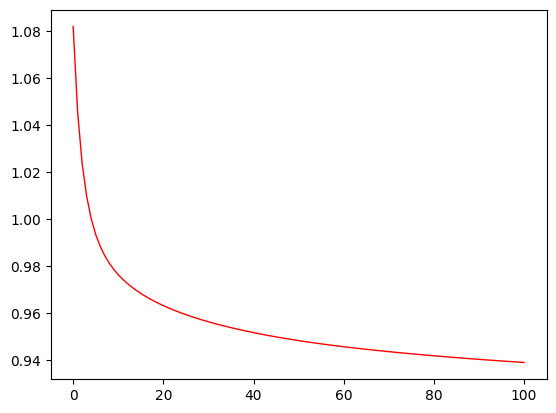

In [15]:
plt.plot(cost_history, 'r', label = 'cost', linewidth = 1)
plt.show()

In [17]:
# minibatch_size = 100, training_epochs = 50, learning_r = 0.001
sess, cost_history1 = model(100, 50, train, labels_, logging_step = 50, learning_r = 0.001)

Reached epoch 0 cost J = 1.0734935
Reached epoch 50 cost J = 0.9499267
Accuracy: 0.78103334


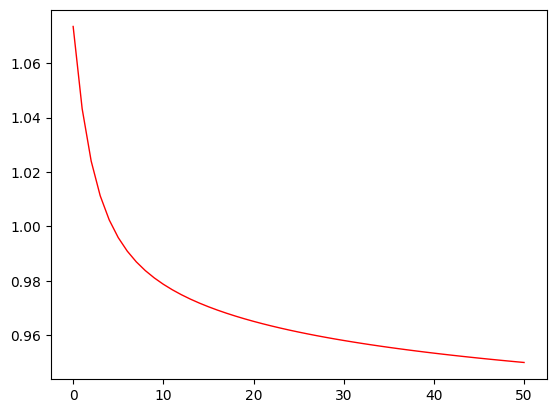

In [18]:
plt.plot(cost_history1, 'r', label = 'cost', linewidth = 1)
plt.show()

In [22]:
sess2 = tf.Session()
sess2, cost_history2 = model(100, 300, train, labels_, logging_step = 50, learning_r = 0.001)

Reached epoch 0 cost J = 1.0869621
Reached epoch 50 cost J = 0.951255
Reached epoch 100 cost J = 0.9411315
Reached epoch 150 cost J = 0.9360631
Reached epoch 200 cost J = 0.9327904
Reached epoch 250 cost J = 0.9303564
Reached epoch 300 cost J = 0.9284174
Accuracy: 0.83915


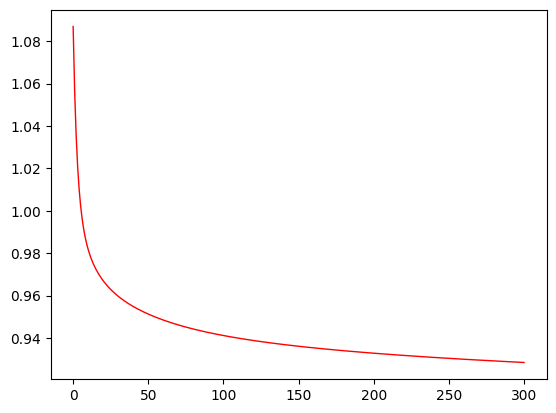

In [23]:
plt.plot(cost_history2, 'r', label = 'cost', linewidth = 1)
plt.show()